In [1]:
pip install lime shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science2/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


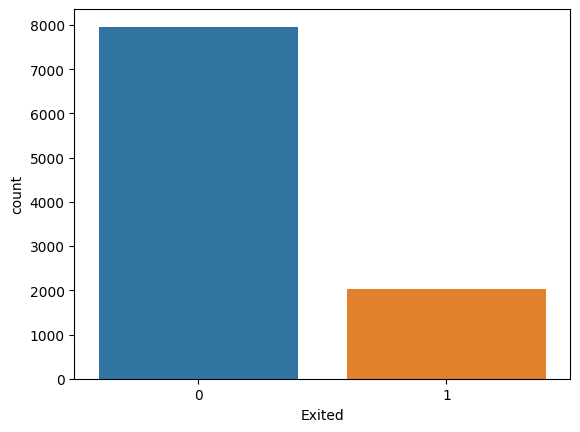

In [9]:
sns.countplot(x='Exited', data=df)
plt.show()

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424


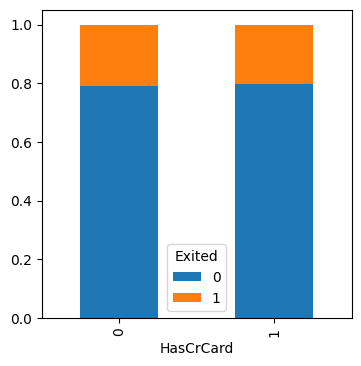

IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735


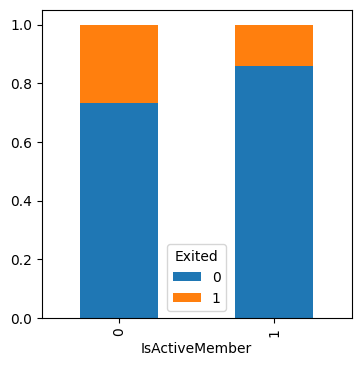

NumOfProducts       1       2      3     4
Exited                                    
0              3675.0  4242.0   46.0   NaN
1              1409.0   348.0  220.0  60.0


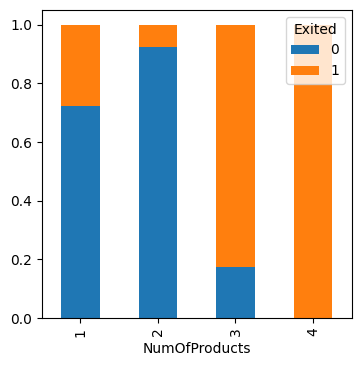

In [16]:
for i in ['HasCrCard','IsActiveMember','NumOfProducts']:
    print(df.groupby(['Exited',i])['Age'].count().unstack())
    df.groupby([i])['Exited'].value_counts(normalize=True).unstack().plot.bar(stacked=True, figsize=(4,4))
    plt.show()

<Axes: xlabel='Exited', ylabel='Age'>

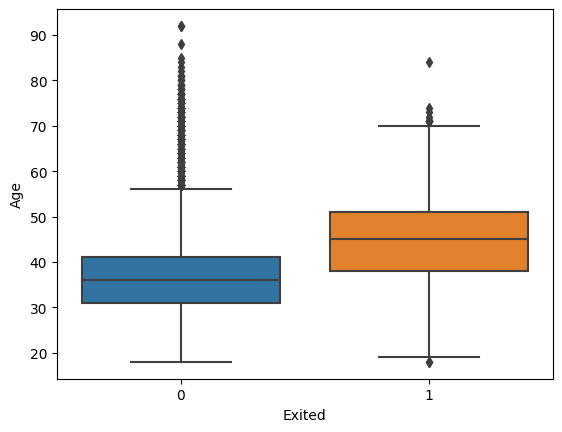

In [12]:
sns.boxplot(x='Exited', y='Age', data=df) 

<Axes: xlabel='Exited', ylabel='Tenure'>

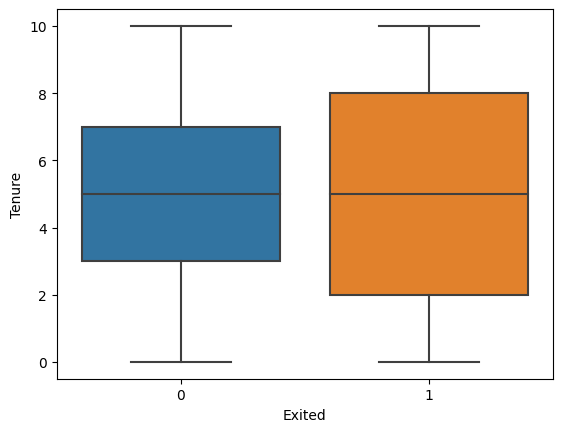

In [13]:
sns.boxplot(x='Exited', y='Tenure', data=df) 

<Axes: xlabel='Exited', ylabel='Balance'>

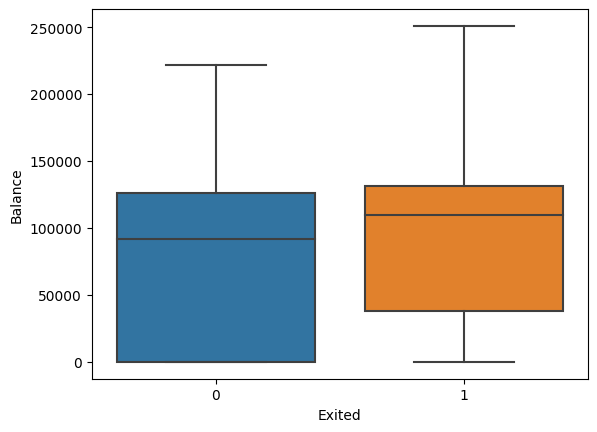

In [14]:
sns.boxplot(x='Exited', y='Balance', data=df) 

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

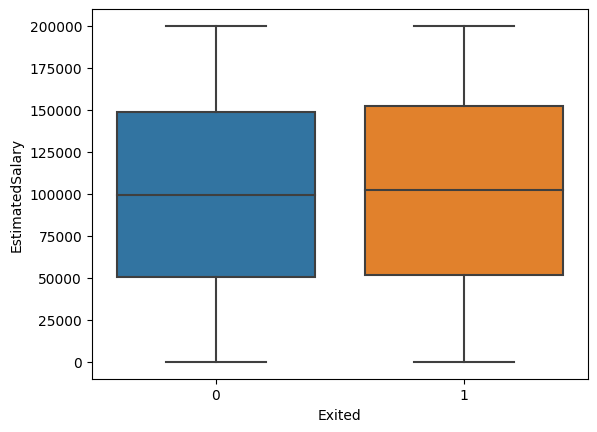

In [17]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df) 

<Axes: xlabel='Exited', ylabel='CreditScore'>

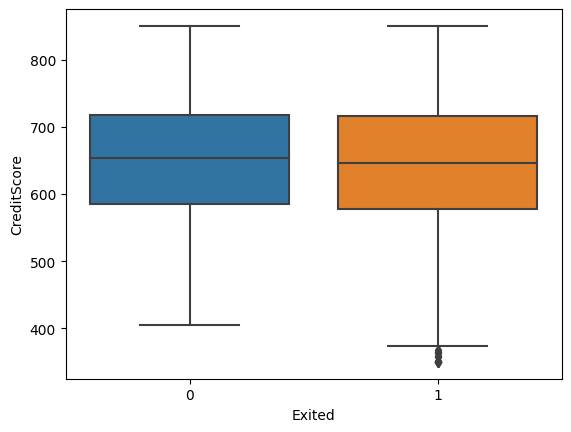

In [18]:
sns.boxplot(x='Exited', y='CreditScore', data=df) 

### So from the above information, we can say the features 'Age','IsActiveMember','NumOfProducts' and 'Balance' should be the significant variables to the target value 'Exited'.

In [24]:
y = df['Exited']
X = df.drop('Exited', axis=1)

In [25]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

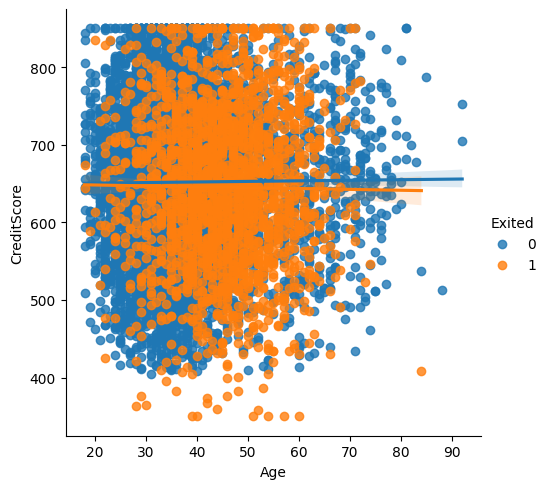

In [29]:
sns.lmplot(x='Age',y='CreditScore',hue='Exited',data=df)

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])


In [32]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)

In [33]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_transformed, y_train)

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [34]:
# Random Forest feature importance
rf_importance = rf_model.feature_importances_
print(f"Random Forest Feature Importance: {rf_importance}")

# Logistic Regression feature importance (coefficients)
lr_importance = lr_model.coef_
print(f"Logistic Regression Coefficients: {lr_importance}")

Random Forest Feature Importance: [0.05378024 0.05255119 0.05359013 ... 0.00626746 0.00694259 0.00674495]
Logistic Regression Coefficients: [[-0.03973533 -0.01199614 -0.07379394 ... -0.23311677  0.23937974
  -0.31418974]]


In [37]:
X_test = np.array(X_train)

In [39]:
import lime
import lime.lime_tabular
import numpy as np

feature_names = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany', 'Spain','Male']
target_names = ['Exited','Not Exit']

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train), mode="classification", training_labels=np.array(y_train), feature_names=feature_names, class_names=target_names, discretize_continuous=True)

# Explain a prediction (Random Forest)
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], rf_model.predict_proba, num_features=4)
#exp.show_in_notebook()

TypeError: unsupported operand type(s) for -: 'str' and 'str'